# Setup

In [1]:
# Load libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.ticker import FormatStrFormatter
from matplotlib_scalebar.scalebar import ScaleBar
from pylab import rcParams
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 72

import seaborn as sns
#sns.set_style("darkgrid")
#sns.set_context(context="paper", font_scale=1.5, rc=None)
#sns.set(font="serif")

import plotly.express as px
import plotly.graph_objects as go

import geopandas as gpd


import libpysal
from libpysal  import weights
from libpysal.weights import Queen

import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster, plot_local_autocorrelation
from splot.libpysal import plot_spatial_weights

from giddy.directional import Rose

import statsmodels.api as sm
import statsmodels.formula.api as smf

from spreg import OLS
from spreg import MoranRes
from spreg import ML_Lag
from spreg import ML_Error 

from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import shift_colormap, truncate_colormap

import warnings
warnings.filterwarnings('ignore') 

# Import  data

In [2]:
gdf = gpd.read_file("/work/tutorial-spatial-cross-section-columbus-crime/columbus.geojson")
gdf

,AREA,PERIMETER,COLUMBUS_,COLUMBUS_I,POLYID,NEIG,HOVAL,INC,CRIME,OPEN,PLUMB,DISCBD,X,Y,NSA,NSB,EW,CP,THOUS,NEIGNO,geometry
0,0.309441,2.440629,2,5,1,5,80.467003,19.531000,15.725980,2.850747,0.217155,5.03,38.799999,44.070000,1,1,1,0,1000,1005,"POLYGON ((8.62413 14.23698, 8.55970 14.74245, ..."
1,0.259329,2.236939,3,1,2,1,44.567001,21.232000,18.801754,5.296720,0.320581,4.27,35.619999,42.380001,1,1,0,0,1000,1001,"POLYGON ((8.25279 14.23694, 8.28276 14.22994, ..."
2,0.192468,2.187547,4,6,3,6,26.350000,15.956000,30.626781,4.534649,0.374404,3.89,39.820000,41.180000,1,1,1,0,1000,1006,"POLYGON ((8.65331 14.00809, 8.81814 14.00205, ..."
3,0.083841,1.427635,5,2,4,2,33.200001,4.477000,32.387760,0.394427,1.186944,3.70,36.500000,40.520000,1,1,0,0,1000,1002,"POLYGON ((8.45950 13.82035, 8.47341 13.83227, ..."
4,0.488888,2.997133,6,7,5,7,23.225000,11.252000,50.731510,0.405664,0.624596,2.83,40.009998,38.000000,1,1,1,0,1000,1007,"POLYGON ((8.68527 13.63952, 8.67758 13.72221, ..."
5,0.283079,2.335634,7,8,6,8,28.750000,16.028999,26.066658,0.563075,0.254130,3.78,43.750000,39.279999,1,1,1,0,1000,1008,"POLYGON ((9.40138 13.55040, 9.43441 13.69427, ..."
6,0.257084,2.554577,8,4,7,4,75.000000,8.438000,0.178269,0.000000,2.402402,2.74,33.360001,38.410000,1,1,0,0,1000,1004,"POLYGON ((8.03774 13.60752, 8.06272 13.60452, ..."
7,0.204954,2.139524,9,3,8,3,37.125000,11.337000,38.425858,3.483478,2.739726,2.89,36.709999,38.709999,1,1,0,0,1000,1003,"POLYGON ((8.24753 13.58651, 8.27950 13.59650, ..."
8,0.500755,3.169707,10,18,9,18,52.599998,17.586000,30.515917,0.527488,0.890736,3.17,43.439999,35.919998,1,1,1,0,1000,1018,"POLYGON ((9.33330 13.27242, 9.67101 13.27361, ..."
9,0.246689,2.087235,11,10,10,10,96.400002,13.598000,34.000835,1.548348,0.557724,4.33,47.610001,36.419998,1,1,1,0,1000,1010,"POLYGON ((10.08251 13.03377, 10.09250 13.05275..."


# Create W

In [3]:
Wqueen = weights.Queen.from_dataframe(gdf, idVariable = 'POLYID')

# Create W in matrix form

In [4]:
WqueenMatrix, ids = Wqueen.full()
df_WqueenMatrix = pd.DataFrame(WqueenMatrix)
df_WqueenMatrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_ids = pd.DataFrame({'polyID': ids})
df_ids

,polyID
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


# W statistics

In [6]:
# how many neighbors does each region have?
WqueenMatrix.sum(axis=1)

array([ 2.,  3.,  4.,  4.,  8.,  2.,  4.,  6.,  8.,  4.,  5.,  6.,  4.,
        6.,  6.,  8.,  3.,  4.,  3., 10.,  3.,  6.,  3.,  7.,  8.,  6.,
        4.,  9.,  7.,  5.,  3.,  4.,  4.,  4.,  7.,  5.,  6.,  6.,  3.,
        5.,  3.,  2.,  6.,  5.,  4.,  2.,  2.,  4.,  3.])

In [7]:
WqueenCount = pd.DataFrame(WqueenMatrix.sum(axis=1))
WqueenCount.describe().round(2)

,0
count,49.00
mean,4.82
std,1.99
min,2.00
25%,3.00
50%,4.00
75%,6.00
max,10.00


In [8]:
Wqueen.pct_nonzero

9.82923781757601

In [9]:
Wqueen.neighbors

{1: [2, 3],
 2: [1, 3, 4],
 3: [1, 2, 4, 5],
 4: [8, 2, 3, 5],
 5: [3, 4, 6, 8, 9, 11, 15, 16],
 6: [9, 5],
 7: [8, 12, 13, 14],
 8: [4, 5, 7, 11, 12, 13],
 9: [5, 6, 10, 15, 20, 22, 25, 26],
 10: [17, 20, 22, 9],
 11: [16, 5, 8, 12, 15],
 12: [16, 7, 8, 11, 13, 14],
 13: [8, 12, 14, 7],
 14: [16, 18, 19, 7, 12, 13],
 15: [16, 5, 9, 26, 11, 25],
 16: [5, 11, 12, 14, 15, 18, 24, 25],
 17: [10, 20, 23],
 18: [24, 16, 19, 14],
 19: [24, 18, 14],
 20: [32, 33, 35, 40, 9, 10, 17, 22, 23, 27],
 21: [24, 34, 30],
 22: [26, 20, 9, 10, 27, 28],
 23: [32, 17, 20],
 24: [16, 18, 19, 21, 25, 29, 30],
 25: [9, 15, 16, 24, 26, 28, 29, 30],
 26: [22, 9, 28, 29, 25, 15],
 27: [33, 20, 28, 22],
 28: [33, 35, 37, 38, 22, 25, 26, 27, 29],
 29: [37, 38, 24, 25, 26, 28, 30],
 30: [37, 21, 24, 25, 29],
 31: [34, 36, 39],
 32: [40, 41, 20, 23],
 33: [27, 35, 20, 28],
 34: [42, 36, 21, 31],
 35: [33, 20, 38, 40, 43, 44, 28],
 36: [34, 39, 42, 46, 31],
 37: [29, 38, 43, 28, 45, 30],
 38: [29, 35, 37, 43, 44, 2

# Standardized W

In [10]:
WqueenStand = weights.Queen.from_dataframe(gdf, idVariable = 'POLYID')
# >>> Row-standardize W
WqueenStand.transform = 'r'

# Plot W

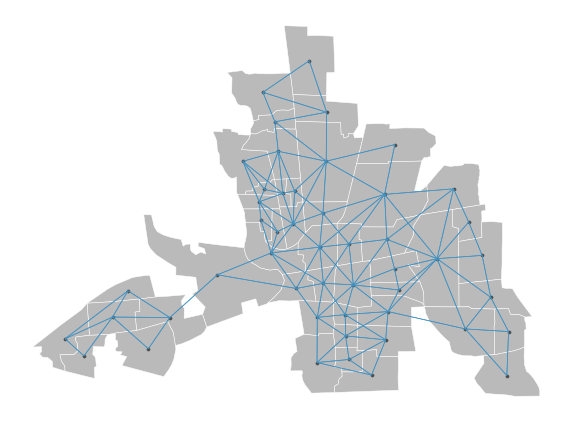

In [11]:
WqueenPlot = weights.Queen.from_dataframe(gdf)
plot_spatial_weights(WqueenPlot, gdf);

# Indentify neighbors

In [12]:
Wqueen.neighbors[20]

[32, 33, 35, 40, 9, 10, 17, 22, 23, 27]

In [13]:
# What are the neighbors of POLYID = 20)?
self_and_neighbors = [20]
self_and_neighbors.extend(Wqueen.neighbors[20])
neighborsOnly = Wqueen.neighbors[20]

In [14]:
gdf.query('POLYID in @neighborsOnly')

,AREA,PERIMETER,COLUMBUS_,COLUMBUS_I,POLYID,NEIG,HOVAL,INC,CRIME,OPEN,PLUMB,DISCBD,X,Y,NSA,NSB,EW,CP,THOUS,NEIGNO,geometry
8,0.500755,3.169707,10,18,9,18,52.599998,17.586000,30.515917,0.527488,0.890736,3.17,43.439999,35.919998,1,1,1,0,1000,1018,"POLYGON ((9.33330 13.27242, 9.67101 13.27361, ..."
9,0.246689,2.087235,11,10,10,10,96.400002,13.598000,34.000835,1.548348,0.557724,4.33,47.610001,36.419998,1,1,1,0,1000,1010,"POLYGON ((10.08251 13.03377, 10.09250 13.05275..."
16,0.102087,1.382359,18,11,17,11,41.750000,9.798000,36.868774,0.448232,1.619745,4.47,48.580002,34.459999,1,1,1,0,1000,1011,"POLYGON ((10.35660 12.78114, 10.50110 12.80532..."
21,0.192891,1.992717,23,19,22,19,30.450001,11.709000,33.705048,4.539754,1.785714,2.45,43.369999,33.459999,1,1,1,1,1000,1019,"POLYGON ((9.38601 12.59624, 9.47150 12.59571, ..."
22,0.247120,2.147528,24,12,23,12,47.733002,21.155001,20.048504,0.532632,0.216763,4.78,49.610001,32.650002,0,0,1,0,1000,1012,"POLYGON ((10.66777 12.64803, 10.77667 12.65201..."
26,0.137802,1.780751,28,21,27,21,34.099998,10.822000,52.794430,19.368099,1.483516,2.24,43.950001,31.610001,0,0,1,1,1000,1021,"POLYGON ((9.46878 12.23455, 9.65693 12.27403, ..."
31,0.185580,2.108951,33,13,32,13,40.299999,18.941999,19.145592,2.221022,0.255102,4.76,50.110001,29.910000,0,0,1,0,1000,1013,"POLYGON ((10.42425 11.99064, 10.64090 12.01312..."
32,0.087472,1.507971,34,22,33,22,23.600000,9.918000,41.968163,0.000000,1.023891,2.28,44.099998,30.400000,0,0,1,1,1000,1022,"POLYGON ((9.48067 12.00275, 9.75540 12.00493, ..."
34,0.175453,1.974937,36,23,35,23,27.000000,12.814000,39.175053,4.220401,0.633675,2.37,43.700001,29.180000,0,0,1,1,1000,1023,"POLYGON ((9.48954 11.85992, 9.63947 11.86325, ..."
39,0.302908,2.285487,41,16,40,16,61.950001,29.833000,16.241299,6.451310,0.132743,4.40,48.439999,27.930000,0,0,1,0,1000,1016,"POLYGON ((10.05659 11.74391, 10.25280 11.74282..."


In [15]:
gdf.query('POLYID in @self_and_neighbors')

,AREA,PERIMETER,COLUMBUS_,COLUMBUS_I,POLYID,NEIG,HOVAL,INC,CRIME,OPEN,PLUMB,DISCBD,X,Y,NSA,NSB,EW,CP,THOUS,NEIGNO,geometry
8,0.500755,3.169707,10,18,9,18,52.599998,17.586000,30.515917,0.527488,0.890736,3.17,43.439999,35.919998,1,1,1,0,1000,1018,"POLYGON ((9.33330 13.27242, 9.67101 13.27361, ..."
9,0.246689,2.087235,11,10,10,10,96.400002,13.598000,34.000835,1.548348,0.557724,4.33,47.610001,36.419998,1,1,1,0,1000,1010,"POLYGON ((10.08251 13.03377, 10.09250 13.05275..."
16,0.102087,1.382359,18,11,17,11,41.750000,9.798000,36.868774,0.448232,1.619745,4.47,48.580002,34.459999,1,1,1,0,1000,1011,"POLYGON ((10.35660 12.78114, 10.50110 12.80532..."
19,0.444629,3.174601,21,17,20,17,81.266998,31.070000,0.223797,5.318607,0.167224,3.57,46.730000,31.910000,0,1,1,0,1000,1017,"POLYGON ((10.01544 12.72405, 10.17841 12.75132..."
21,0.192891,1.992717,23,19,22,19,30.450001,11.709000,33.705048,4.539754,1.785714,2.45,43.369999,33.459999,1,1,1,1,1000,1019,"POLYGON ((9.38601 12.59624, 9.47150 12.59571, ..."
22,0.247120,2.147528,24,12,23,12,47.733002,21.155001,20.048504,0.532632,0.216763,4.78,49.610001,32.650002,0,0,1,0,1000,1012,"POLYGON ((10.66777 12.64803, 10.77667 12.65201..."
26,0.137802,1.780751,28,21,27,21,34.099998,10.822000,52.794430,19.368099,1.483516,2.24,43.950001,31.610001,0,0,1,1,1000,1021,"POLYGON ((9.46878 12.23455, 9.65693 12.27403, ..."
31,0.185580,2.108951,33,13,32,13,40.299999,18.941999,19.145592,2.221022,0.255102,4.76,50.110001,29.910000,0,0,1,0,1000,1013,"POLYGON ((10.42425 11.99064, 10.64090 12.01312..."
32,0.087472,1.507971,34,22,33,22,23.600000,9.918000,41.968163,0.000000,1.023891,2.28,44.099998,30.400000,0,0,1,1,1000,1022,"POLYGON ((9.48067 12.00275, 9.75540 12.00493, ..."
34,0.175453,1.974937,36,23,35,23,27.000000,12.814000,39.175053,4.220401,0.633675,2.37,43.700001,29.180000,0,0,1,1,1000,1023,"POLYGON ((9.48954 11.85992, 9.63947 11.86325, ..."


In [16]:
# to be read by the spmatrix (from Stata 15)
df_ids_AND_WqueenMatrix = pd.merge(df_ids, df_WqueenMatrix, left_index=True, right_index=True)
df_ids_AND_WqueenMatrix

,polyID,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Export W

In [17]:
df_ids_AND_WqueenMatrix.to_csv('df_ids_AND_WqueenMatrix.csv')
df_WqueenMatrix.to_csv('df_WqueenMatrix.csv', index = False)
df_WqueenMatrix.to_stata('df_WqueenMatrix.dta', write_index = False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d3458c2b-7b0a-425f-b3ea-855191342009' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>